# 1.商业真正在用的，都是Domain Specific 

# 2.AI 已经解决了很多～重复大量～的劳动

# 3.一个真正的AI程序：
1.结合了很多方法，有一些简单，有一些复杂
2.简单的方法主导+部分复杂的方法

# 罗姆剃刀原理

# pattern Based AI

In [16]:

hello_rules = '''
say_hello = name hello
names = name names | name
name = Jhon | Mike | 老梁 |老刘
hello = 你好 | 您来啦 |快请进
tail = 呀 | ！
'''



In [ ]:
'add = number + number'

In [33]:

for line in hello_rules.split('\n'):
    if not line: continue
    # skip the empty line
    
    print(line)
    

say_hello = name hello
names = name names | name
name = Jhon | Mike | 老梁 |老刘
hello = 你好 | 您来啦 |快请进
tail = 呀 | ！


In [17]:
def get_generation_by_gram(grammar_str:str, target, stmt_split='=', or_split='|'):
   

    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line: continue
        # skip the empty line
        prin(line)
        stmt, expr = line.split(stmt_split)

        rules[stmt.strip()] = expr.split(or_split)
        
        
    generated  = generate(rules, target=target)
    
    return generated


In [52]:
def generate(grammar_rule, target):
    if target in grammar_rule: #names 
        candidates = grammar_rule[target] #['name names', 'name']
        candidate = random.choice(candidates) #'name names','name'
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate)
    else:
        return target

In [56]:
simple_grammar = '''
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐着 | 听着 | 看见
Adj => 蓝色的 |  好看的 | 小小的 
'''

In [58]:
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

{'Adj': [' 蓝色的 ', '  好看的 ', ' 小小的 ']}


'sentence'

In [42]:
simpel_programming = '''
if_stmt => if (cond) {stmt}
cond = var op var
op => | == | >= | <=
stmt => assign | if_stmt
assign => var = var
var => var char | char
char => a | b | c | d 
'''

In [59]:
for i in range(20):
 print(get_generation_by_gram(simpel_programming, target= 'if', stmt_split='=>'))

{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if
{'char': [' a ', ' b ', ' c ', ' d ']}
if




# Data Driven

# 1990S 第一篇机器学习真正应用的论文，Data Driven

# 期望我们的程序，能够根据我们输入的数据，自动进行处理，而不
# 是说，数据一变，我们的程序也要随之进行变化。

#  智能客服机器人小美
# 微软小冰
# 建行的机器人， 中行的机器人
# 文本的分析匹配

# 只要你发现有大量的if- else,大量的规则要做的时候

In [53]:
rules

{'say_hello': [' name hello'],
 'names': [' name names ', ' name'],
 'name': [' Jhon ', ' Mike ', ' 老梁 ', '老刘'],
 'hello': [' 你好 ', ' 您来啦 ', '快请进'],
 'tail': [' 呀 ', ' ！']}

In [56]:
rules['name']

[' Jhon ', ' Mike ', ' 老梁 ', '老刘']

In [57]:
rules['names']

[' name names ', ' name']

In [78]:
def generate(grammar_rule, target):
    if target in grammar_rule: #names 
        candidates = grammar_rule[target] #['name names', 'name']
        candidate = random.choice(candidates) #'name names','name'
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate)
    else:
        return target

In [90]:
generate(rules, target='say_hello')

'namehello'

In [76]:
generate(rules, target='老梁')

'老梁'

# language model
# lnput:Sentence(w1..wn)¶
# Output:Pribability(0-1)
# 2-Gram

         

$$ pr(sentence) = pr(w_1 \cdot w_2 \cdots w_n) = \prod \orac{count(w_i, w_{i+1})}{count(v_i)}$$

In [71]:
coupus= "//Users/krmzzy/jupyters_and_slides/2019-summer/article_9k.txt"

In [72]:
FILE = open(coupus).read()

In [73]:
len(FILE)

24012668

In [74]:
def generate_by_pro(text_corpus,length=20):
    return ''.join(random.sample(text_corpus, length))

In [75]:
FILE[:500]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CP\x01蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首'

In [77]:
import jieba

In [82]:
max_length = 1000000

sub_file = FILE[:max_length]

In [83]:
def cut(string):
    return list(jieba.cut(string))

In [96]:
TOKENS = cut(sub_file)

In [97]:
TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [85]:
len(TOKENS)

533785

In [86]:
from collections import Counter

In [87]:
%matplotlib inline

In [98]:
words_count = Counter(TOKENS)

In [99]:
words_count.most_common(100)

[('的', 28965),
 ('在', 7573),
 ('了', 6790),
 ('是', 4916),
 ('和', 4202),
 ('也', 2679),
 ('有', 2424),
 ('月', 2129),
 ('他', 2005),
 ('将', 1974),
 ('年', 1832),
 ('对', 1749),
 ('都', 1743),
 ('等', 1681),
 ('为', 1673),
 ('我', 1653),
 ('就', 1642),
 ('上', 1640),
 ('不', 1615),
 ('与', 1564),
 ('中', 1531),
 ('被', 1513),
 ('到', 1498),
 ('中国', 1487),
 ('6', 1415),
 ('日', 1410),
 ('这', 1326),
 ('人', 1317),
 ('一个', 1228),
 ('但', 1223),
 ('我们', 1179),
 ('从', 1172),
 ('\n', 1170),
 ('后', 1163),
 ('并', 1149),
 ('还', 1123),
 ('说', 1069),
 ('会', 1047),
 ('而', 1013),
 ('没有', 985),
 ('记者', 902),
 ('让', 888),
 ('市场', 869),
 ('进行', 863),
 ('已经', 854),
 ('可以', 852),
 ('自己', 845),
 ('要', 832),
 ('他们', 809),
 ('表示', 807),
 ('下', 765),
 ('个', 755),
 ('公司', 730),
 ('时', 723),
 ('以', 712),
 ('更', 706),
 ('发展', 682),
 ('着', 681),
 ('其', 661),
 ('你', 661),
 ('多', 659),
 ('5', 651),
 ('这个', 651),
 ('就是', 647),
 ('企业', 645),
 ('能', 641),
 ('目前', 635),
 ('以及', 606),
 ('可能', 605),
 ('3', 587),
 ('给', 583),
 ('她', 573),
 ('

In [89]:
words_with_fre = [f for w, f in words_count.most_common()]

In [94]:
import matplotlib.pyplot as plt

In [95]:
words_count.most_common(10)

[('的', 28965),
 ('在', 7573),
 ('了', 6790),
 ('是', 4916),
 ('和', 4202),
 ('也', 2679),
 ('有', 2424),
 ('月', 2129),
 ('他', 2005),
 ('将', 1974)]

In [93]:
words_with_fre[:10]

[28965, 7573, 6790, 4916, 4202, 2679, 2424, 2129, 2005, 1974]

In [101]:
import numpy as np

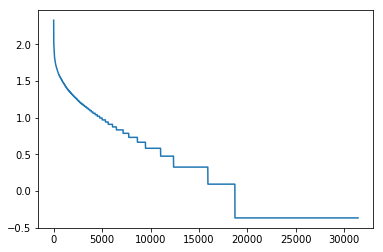

In [103]:
plt.plot(np.log(np.log(words_with_fre)))

# 在大量的文本中，出现次数第二多的单词，它出现的概率是出现最高单词的1/2，出现频率第三高的最高的单词的1/3，1000=>1/1000

In [66]:
list(jieba.cut('一加手机5要做市面最轻薄'))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/27/sf630ldj6nq7t0x4cmymz5s00000gn/T/jieba.cache
Loading model cost 1.161 seconds.
Prefix dict has been built succesfully.


['一加', '手机', '5', '要', '做', '市面', '最', '轻薄']

In [104]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [106]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [107]:
_2_gram_word_counts = Counter(_2_gram_words)

$$ pr(sentence) = pr(w_1 \cdot w_2 \cdots w_n) = \prod \orac{count(w_i, w_{i+1})}{count(v_i)}$$

In [117]:
words_count.most_common()[-1][-1]

1

In [118]:
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [119]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [120]:
def get_gram_count(word, wc):
    if word in wc: return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [121]:
get_gram_count('xxx',words_count)

1

In [122]:
get_gram_count('xxx', _2_gram_word_counts)

1

In [123]:
def two_gram_model(sentence):
    # 2-gram langau
    tokens = cut(sentence)
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
  
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro = _two_gram_c / _one_gram_c
        
        probability *= pro
        
    return probability


In [116]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

2.275687461875643e-21

In [124]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

2.275687461875643e-21

In [125]:
two_gram_model('前天早上吃晚饭的时候')

5.554122591926838e-07

In [126]:
two_gram_model('前天早上使早饭的时候')

6.612050704674807e-09

In [127]:
two_gram_model('我请你吃火锅')

2.9318978761331787e-06

In [128]:
two_gram_model('我请你吃日料大餐')

2.124563678357376e-08

In [129]:
two_gram_model('这个人来自清华大学')

1.8794590165166858e-06

In [130]:
two_gram_model('这个人来自秦华大学')

3.185523756807942e-07

In [131]:
two_gram_model('这个花特别好看')

1.7269964078474716e-05

In [132]:
two_gram_model('花这特别好看')

6.121329650741415e-07

In [2]:
import random

In [10]:
def name():
    return random.choice('Jhon | MIke | 老梁'.split('|'))

In [12]:
name()

'Jhon '

In [13]:
def hello():
    return random.choice('你好 | 您来啦 | 快请进'.split('|'))

In [19]:
hello()

' 您来啦 '

In [8]:
def say_hello():
    return name() + ' ' + hello()

In [21]:
say_hello()

' 老梁  快请进'